# CAE 526 Assignment 3
## Fall 2022
### Al Mitchell

## Problem 1:
In this problem, we are going to compare buildings in Chicago with another city in the U.S. that has a building energy benchmarking ordinance. First, you need to download the City of Chicago benchmarking database. Then, you need to select another city with a building energy benchmarking policy. Most cities have their data easily accessible. You can find a list of cities with building energy benchmarking in this link:


Parts A through D will be done for DC and dccago in parallel, negating Part E

In [140]:
#libraries used

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


### Part a
First start with the City of Chicago data and make sure to remove the buildings with no data (i.e., year construction, area, stie EUI and source EUI) being reported. Provide the total number of buildings with data and without data.


In [141]:
dc = pd.read_csv('Building_Energy_Benchmarking.csv')
chi = pd.read_csv('Chicago_Energy_Benchmarking.csv')

initChi = chi.shape[0]
chi = chi.dropna(subset=['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)', 'Year Built', 'Gross Floor Area - Buildings (sq ft)'])
chi = chi[(chi['Site EUI (kBtu/sq ft)'] < 2000)]
chi = chi[(chi['Source EUI (kBtu/sq ft)'] < 2000)]
finChi = chi.shape[0]

print('Chicagos dataset had ' + str(initChi) + ', but ' + str(initChi - finChi) + ' were eliminated due to lacking data.  The final total is ' + str(finChi))

initDC = dc.shape[0]
dc = dc.dropna(subset=['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA'])
dc = dc[(dc['SITEEUI_KBTU_FT'] < 2000)]
dc = dc[(dc['SOURCEEUI_KBTU_FT'] < 2000)]
finDC = dc.shape[0]

print('DCs dataset had ' + str(initDC) + ', but ' + str(initDC - finDC) + ' were eliminated due to lacking data.  The final total is ' + str(finDC))

Chicagos dataset had 17728, but 3638 were eliminated due to lacking data.  The final total is 14090
DCs dataset had 23015, but 5779 were eliminated due to lacking data.  The final total is 17236


C:\Users\amitc\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Part b
Calculate mean, median, maximum, minimum, and standard deviation of site EUI, source EUI, year built, and gross floor area for buildings smaller than 250,000 ft2 .

In [142]:
chiS = chi[chi['Gross Floor Area - Buildings (sq ft)'] < 250000]
chiS[['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)','Year Built', 'Gross Floor Area - Buildings (sq ft)']].describe()

# chi['Site EUI (kBtu/sq ft)'].describe()
# chi['Source EUI (kBtu/sq ft)'].describe()
# chi['Year Built'].describe()
# chi['Gross Floor Area - Buildings (sq ft)'].describe()

,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Year Built,Gross Floor Area - Buildings (sq ft)
count,9990.000000,9990.000000,9990.000000,9990.000000
mean,96.024835,172.757367,1959.579079,110764.447447
std,80.621826,131.797030,38.090509,52129.444868
min,0.100000,0.200000,1692.000000,27256.000000
25%,62.000000,106.800000,1926.000000,68245.000000
50%,80.800000,138.750000,1964.000000,95445.000000
75%,104.300000,189.675000,1996.000000,142776.000000
max,1692.700000,1788.200000,2020.000000,249910.000000


In [143]:
dcS = dc[dc['TAXRECORDFLOORAREA'] < 250000]
dcS[['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA']].describe()

# chi['Site EUI (kBtu/sq ft)'].describe()
# chi['Source EUI (kBtu/sq ft)'].describe()
# chi['Year Built'].describe()
# chi['Gross Floor Area - Buildings (sq ft)'].describe()

,SITEEUI_KBTU_FT,SOURCEEUI_KBTU_FT,YEARBUILT,TAXRECORDFLOORAREA
count,12788.000000,12788.000000,12788.000000,12788.000000
mean,65.412348,144.413247,1962.694088,98944.514310
std,47.249194,105.243829,33.591152,67709.275858
min,0.000000,0.000000,1727.000000,0.000000
25%,41.000000,91.600000,1940.000000,56076.000000
50%,61.400000,132.100000,1964.000000,86709.000000
75%,82.200000,183.125000,1987.000000,147560.000000
max,685.100000,1866.500000,2019.000000,249966.000000


### Part c
Calculate mean, median, maximum, minimum, and standard deviation of site EUI, source EUI, year built, and gross floor area for buildings larger than 250,000 ft2 .

In [144]:
chiL = chi[chi['Gross Floor Area - Buildings (sq ft)'] >= 250000]
chiL[['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)','Year Built', 'Gross Floor Area - Buildings (sq ft)']].describe()

# chi['Site EUI (kBtu/sq ft)'].describe()
# chi['Source EUI (kBtu/sq ft)'].describe()
# chi['Year Built'].describe()
# chi['Gross Floor Area - Buildings (sq ft)'].describe()

,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Year Built,Gross Floor Area - Buildings (sq ft)
count,4100.000000,4100.000000,4100.000000,4.100000e+03
mean,91.794268,177.501927,1972.561707,6.603319e+05
std,58.230554,106.592174,32.475131,6.666078e+05
min,3.800000,8.400000,1845.000000,2.500000e+05
25%,61.800000,121.700000,1959.000000,3.205420e+05
50%,80.000000,152.750000,1976.000000,4.464830e+05
75%,100.700000,199.000000,2002.000000,7.441620e+05
max,1296.300000,1898.400000,2020.000000,9.245333e+06


In [145]:
dcL = dc[dc['TAXRECORDFLOORAREA'] >= 250000]
dcL[['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA']].describe()

# chi['Site EUI (kBtu/sq ft)'].describe()
# chi['Source EUI (kBtu/sq ft)'].describe()
# chi['Year Built'].describe()
# chi['Gross Floor Area - Buildings (sq ft)'].describe()

,SITEEUI_KBTU_FT,SOURCEEUI_KBTU_FT,YEARBUILT,TAXRECORDFLOORAREA
count,4448.000000,4448.000000,4448.000000,4.448000e+03
mean,65.521021,165.317131,1978.482914,5.069758e+05
std,60.045744,116.868019,30.656943,4.424620e+05
min,0.000000,0.000000,1795.000000,2.500000e+05
25%,44.075000,109.600000,1967.000000,2.979490e+05
50%,58.400000,153.050000,1982.000000,3.819510e+05
75%,74.800000,202.550000,2002.000000,5.267680e+05
max,1293.400000,1467.800000,2019.000000,3.997572e+06


### Part d
Plot the histogram of EUIs (site and source), gross floor area, and year built.

array([[<AxesSubplot:title={'center':'SITEEUI_KBTU_FT'}>,
        <AxesSubplot:title={'center':'SOURCEEUI_KBTU_FT'}>],
       [<AxesSubplot:title={'center':'YEARBUILT'}>,
        <AxesSubplot:title={'center':'TAXRECORDFLOORAREA'}>]],
      dtype=object)

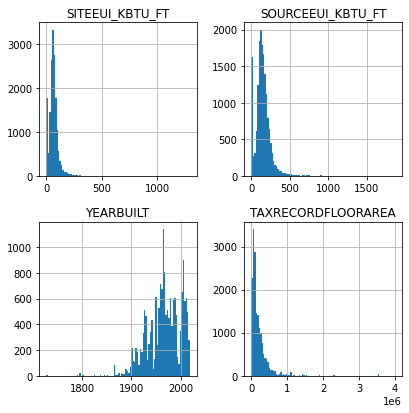

In [146]:
dc[['SITEEUI_KBTU_FT', 'SOURCEEUI_KBTU_FT', 'YEARBUILT', 'TAXRECORDFLOORAREA']].hist(bins=100,figsize=(6.5,6.5))

array([[<AxesSubplot:title={'center':'Site EUI (kBtu/sq ft)'}>,
        <AxesSubplot:title={'center':'Source EUI (kBtu/sq ft)'}>],
       [<AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'Gross Floor Area - Buildings (sq ft)'}>]],
      dtype=object)

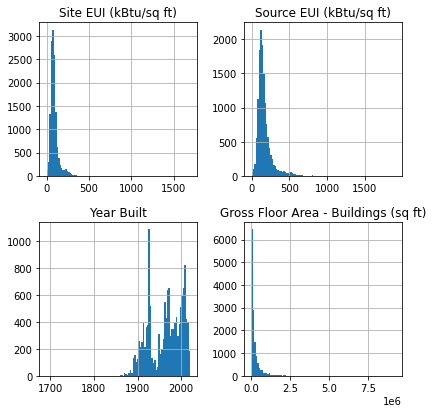

In [147]:
chi[['Site EUI (kBtu/sq ft)', 'Source EUI (kBtu/sq ft)','Year Built', 'Gross Floor Area - Buildings (sq ft)']].hist(bins=100,figsize=(6.5,6.5))

### Part e
Already Complete

### Part f
Compare the results of parts (a) to (e) in a tabular format or graphs. You need to think critically on how you would like to present the data. Please, explain similarities and differences between the two cities.

#### Key Oberservations:
- Very few buildings that exist in the data are built before 1850, meaning many of them are either non-compliant, non-existent, or less than the 50,000 ft2 limit
- Many of the largest buildings in both cities were built in the 1930's and 1970's.  The largest building shown on the graph is likely the Sears Tower
- there is no strong correlation with EUI and floor area, meaning that another variable must control the energy intensity
- The most energy intensive buildings were built in the 1950's-1970's, likely due to the Miesification of architecture and high amounts of glazing in international style buildings.

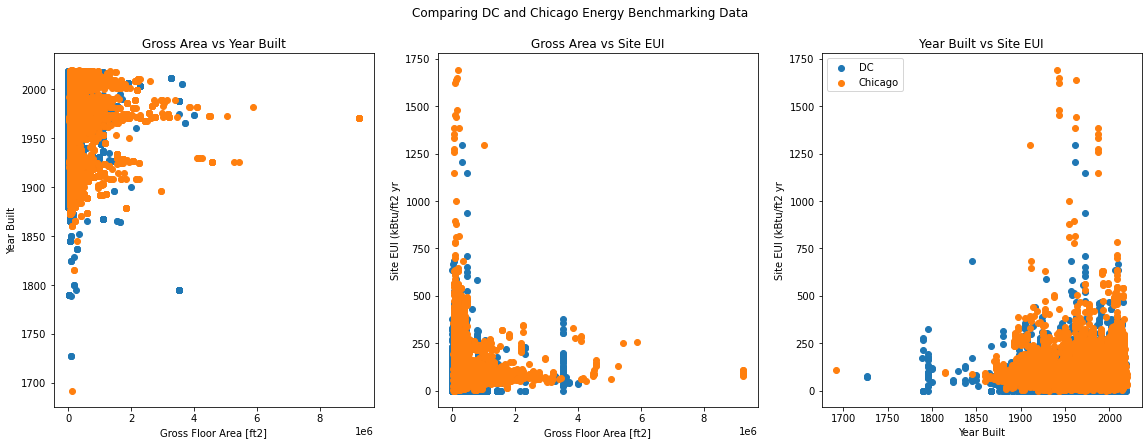

In [148]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(19.5,6.5))
fig.suptitle('Comparing DC and Chicago Energy Benchmarking Data')

dcA = dc['TAXRECORDFLOORAREA']
dcE = dc['SITEEUI_KBTU_FT']
dcY = dc['YEARBUILT']

chiA = chi['Gross Floor Area - Buildings (sq ft)']
chiE = chi['Site EUI (kBtu/sq ft)']
chiY = chi['Year Built']

ax1.scatter(dcA, dcY, label='DC')
ax1.scatter(chiA, chiY, label='Chicago')
ax1.set_xlabel('Gross Floor Area [ft2]')
ax1.set_ylabel('Year Built')
ax1.set_title('Gross Area vs Year Built')

ax2.scatter(dcA,dcE, label='DC')
ax2.scatter(chiA, chiE, label='Chicago')
ax2.set_xlabel('Gross Floor Area [ft2]')
ax2.set_ylabel('Site EUI (kBtu/ft2 yr')
ax2.set_title('Gross Area vs Site EUI')

ax3.scatter(dcY,dcE, label='DC')
ax3.scatter(chiY, chiE, label='Chicago')
ax3.set_xlabel('Year Built')
ax3.set_ylabel('Site EUI (kBtu/ft2 yr')
ax3.set_title('Year Built vs Site EUI')
ax3.legend()

plt.show()


### Part g

Compare these numbers with the number of buildings used in CBECS database.

In [149]:
cbecs2018gas = 67994
cbecs2018all = 96758

dcF = dc.dropna(subset=['NATURALGASUSE_THERMS'])
dcGas = dcF.shape[0]

chiF = chi.dropna(subset=['Natural Gas Use (kBtu)'])
chiGas = chiF.shape[0]

print('DC Data set has ' + str(dcGas) + " buildings consuming natural gas, which is " + str((dcGas / finDC) * 100) + " percent of buildings, compared to national percentage of " + str((cbecs2018gas / cbecs2018all)*100))
print('Chicago Data set has ' + str(chiGas) + " buildings consuming natural gas, which is " + str((chiGas / finChi) * 100) + " percent of buildings, compared to national percentage of " + str((cbecs2018gas / cbecs2018all)*100))


DC Data set has 17236 buildings consuming natural gas, which is 100.0 percent of buildings, compared to national percentage of 70.27222555240911
Chicago Data set has 12836 buildings consuming natural gas, which is 91.1000709723208 percent of buildings, compared to national percentage of 70.27222555240911
